# Name:- ARCHANA DIXIT
### Course:- DATA SCIENCE AND BISINESS ANALYTICS 

# Task - #4

***Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’***

***As a security/defense analyst, try to find out the hot zone of terrorism.***

***What all security issues and insights you can derive by EDA?***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r"C:\\Users\\archy\\OneDrive\\Documents\\TSF-GRIP\\task_4.csv",encoding='latin1')

In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.shape

(181691, 135)

In [6]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [7]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [9]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 4550


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
68,1.970020e+11,1970,2,16,NaN,0,NaN,217,United States,1,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,"197002160002, 197002160003"
88,1.970020e+11,1970,2,23,NaN,0,NaN,217,United States,1,...,NaN,Committee on Government Operations United Stat...,NaN,NaN,Hewitt Project,-9,-9,0,-9,"197002230001, 197002230002, 197002230003, 1970..."
89,1.970020e+11,1970,2,23,NaN,0,NaN,217,United States,1,...,NaN,Committee on Government Operations United Stat...,NaN,NaN,Hewitt Project,-9,-9,0,-9,"197002230001, 197002230002, 197002230003, 1970..."
90,1.970020e+11,1970,2,23,NaN,0,NaN,217,United States,1,...,NaN,Committee on Government Operations United Stat...,NaN,NaN,Hewitt Project,-9,-9,0,-9,"197002230001, 197002230002, 197002230003, 1970..."
337,1.970060e+11,1970,6,9,NaN,1,06-12-1970,102,Jordan,10,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,"197006090004, 197006090005"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181270,2.017120e+11,2017,12,12,NaN,0,NaN,160,Philippines,5,...,NaN,"""AFP says NPA now kept to launching token atta...",NaN,NaN,START Primary Collection,0,0,0,0,"201712120030, 201712120031"
181321,2.017120e+11,2017,12,15,NaN,0,NaN,123,Mali,11,...,Casualty numbers conflict across sources. Foll...,"""Guinean UN peacekeeper dies of wounds,"" The N...","""Africa Command OSINT Daily 19 December 2017,""...","""Africa Command OSINT Daily 18 December 2017,""...",START Primary Collection,0,1,1,1,"201712150003, 201712150004, 201712150005, 2017..."
181397,2.017120e+11,2017,12,18,NaN,0,NaN,153,Pakistan,6,...,NaN,"""Balochistan: 220 KV transmission line partial...","""Two poles partially damaged in explosion,"" Pa...","""Highlights: Pakistan Balochistan Press 19 Dec...",START Primary Collection,0,0,0,0,"201712180013, 201712180022"
181634,2.017120e+11,2017,12,29,NaN,0,NaN,97,Israel,10,...,NaN,"""IDF Retaliates Against Hamas in Gaza, Warns ...","""Update: IDF Retailates for Gaza Rockets Fired...",NaN,START Primary Collection,-9,-9,1,1,"201712290013, 201712290014, 201712290015"


In [10]:
df.drop_duplicates(inplace=True) 

In [11]:
df.shape

(177141, 135)

In [12]:
df.isnull().sum()[df.isnull().sum()>0]


approxdate    168722
resolution    174924
provstate        421
city             434
latitude        4369
               ...  
addnotes      149306
scite1         63653
scite2        101229
scite3        134180
related       154675
Length: 106, dtype: int64

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
eventid,177141.0,2.002812e+11,1.318179e+09,1.970000e+11,1.991040e+11,2.009030e+11,2.014080e+11,2.017120e+11
iyear,177141.0,2.002747e+03,1.318172e+01,1.970000e+03,1.991000e+03,2.009000e+03,2.014000e+03,2.017000e+03
imonth,177141.0,6.468807e+00,3.392291e+00,0.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01
iday,177141.0,1.551411e+01,8.814709e+00,0.000000e+00,8.000000e+00,1.500000e+01,2.300000e+01,3.100000e+01
extended,177141.0,4.600290e-02,2.094920e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
...,...,...,...,...,...,...,...,...
nreleased,10317.0,-2.877484e+01,6.574163e+01,-9.900000e+01,-9.900000e+01,0.000000e+00,1.000000e+00,2.769000e+03
INT_LOG,177141.0,-4.541580e+00,4.543592e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,0.000000e+00,1.000000e+00
INT_IDEO,177141.0,-4.463128e+00,4.636398e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,0.000000e+00,1.000000e+00
INT_MISC,177141.0,9.266629e-02,5.569309e-01,-9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [17]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [18]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

Text(0.5, 1.0, 'Country wise Attack')

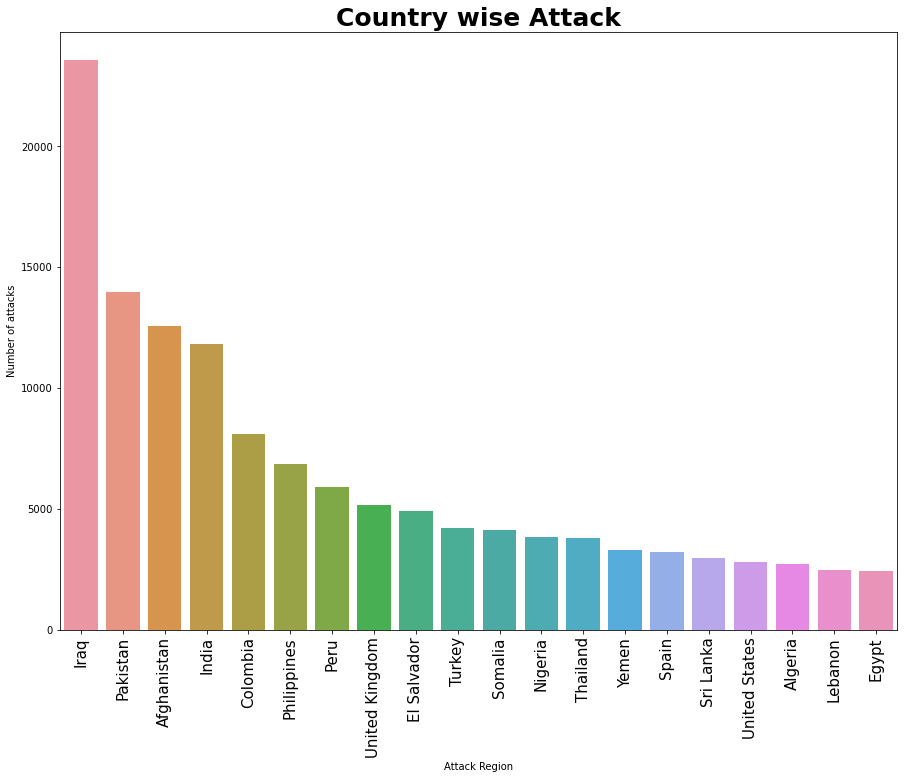

In [19]:
plt.rcParams['figure.figsize']=15,11
sns.barplot(x=df['country_txt'].value_counts()[:20].index,y=df['country_txt'].value_counts()[:20].values)
plt.ylabel('Number of attacks',fontsize=15)
plt.xticks(rotation=90, fontsize=15)

plt.xticks(rotation=90)
plt.xlabel('Attack Region'fontsize=15)
plt.title('Country wise Attack',size=25, fontweight="bold")

Text(0.5, 1.0, 'Region wise Attack')

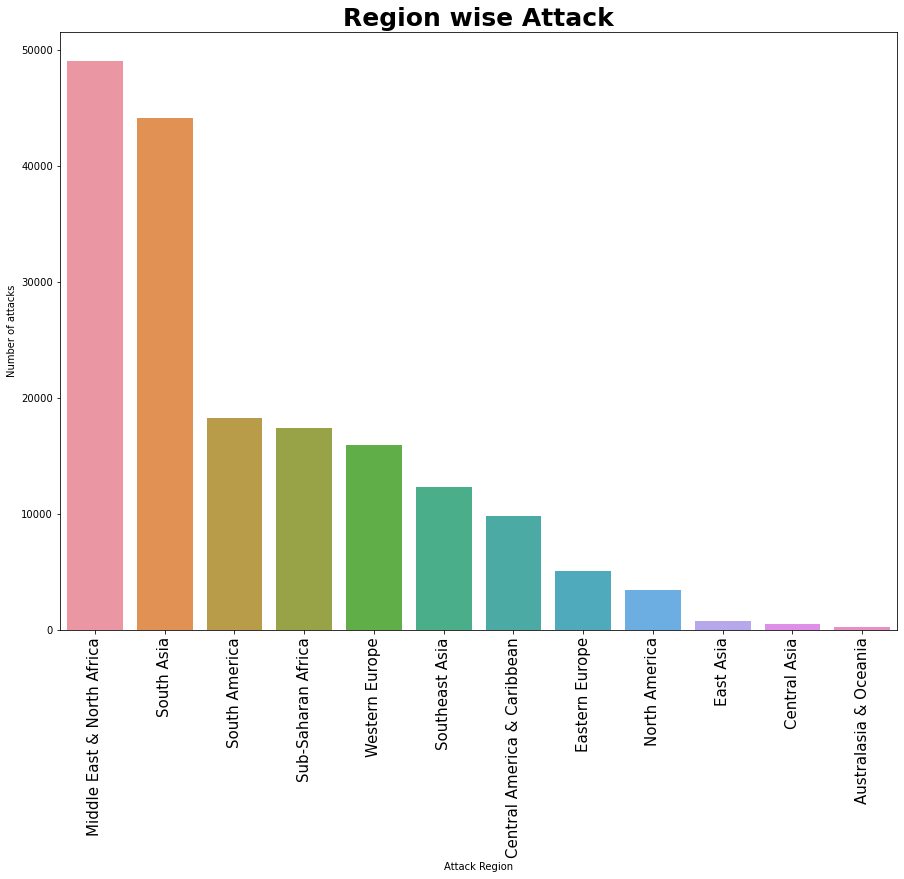

In [20]:
plt.rcParams['figure.figsize']=15,11
sns.barplot(x=df['region_txt'].value_counts()[:20].index,y=df['region_txt'].value_counts()[:20].values)
plt.ylabel('Number of attacks')
plt.xticks(rotation=90, fontsize=15)
plt.xlabel('Attack Region')
plt.title('Region wise Attack',size=25, fontweight="bold")

Text(0.5, 1.0, 'Yearly analysis')

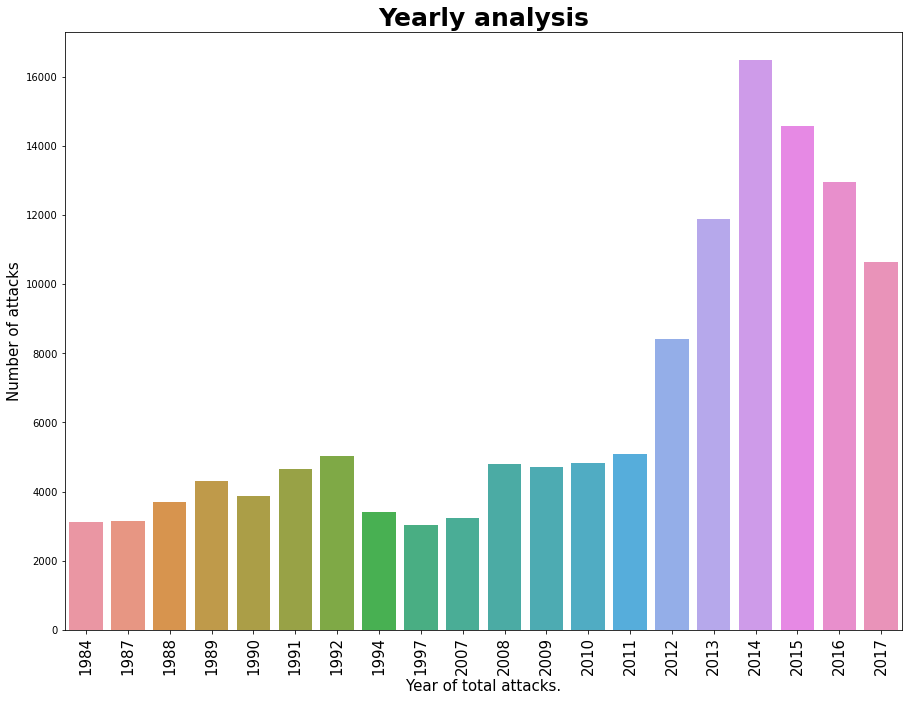

In [21]:
plt.rcParams['figure.figsize']=15,11
sns.barplot(x=df['iyear'].value_counts()[:20].index,y=df['iyear'].value_counts()[:20].values)
plt.ylabel('Number of attacks', fontsize =15)
plt.xticks(rotation=90, fontsize=15)
plt.xlabel('Year of total attacks.', fontsize =15)
plt.title('Yearly analysis',size=25, fontweight="bold")

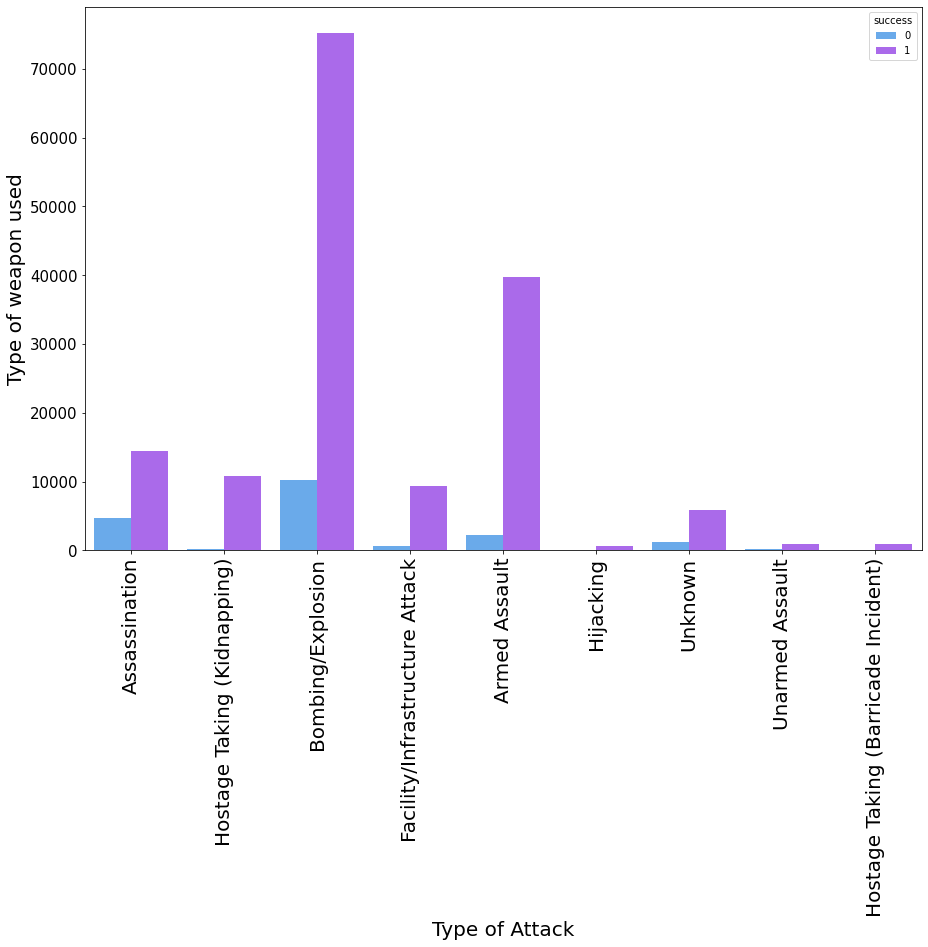

In [59]:
plt.figure(figsize=(15,10)) 
sns.countplot(df["attacktype1_txt"],hue=df["success"],palette='cool') 
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel('Type of Attack',fontsize=20)
plt.ylabel('Type of weapon used', fontsize =20)
plt.show()


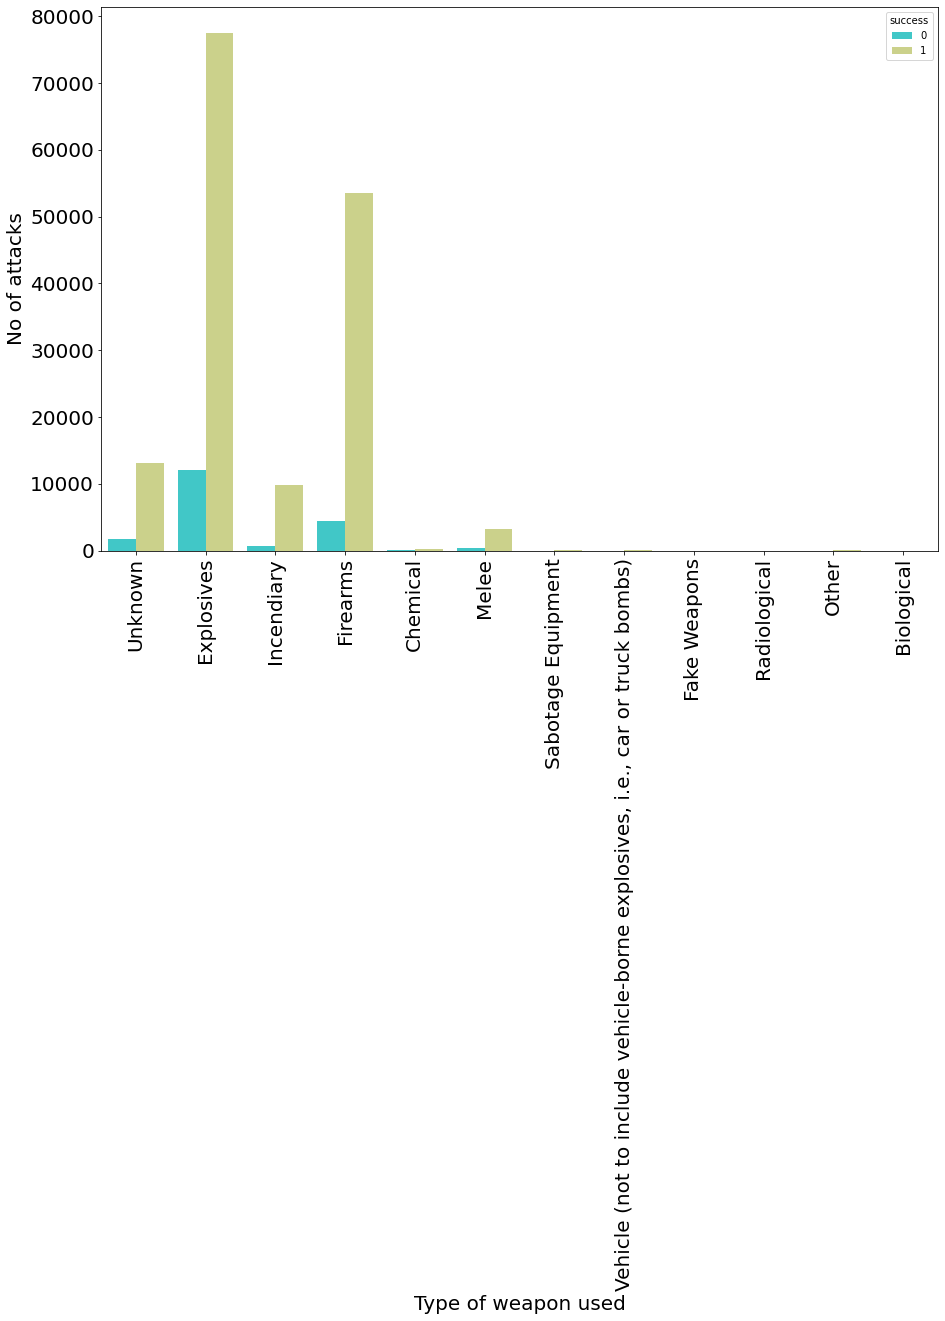

In [58]:
plt.figure(figsize=(15,10)) 
sns.countplot(df["weaptype1_txt"],hue=df["success"],palette='rainbow') 
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel('Type of weapon used',fontsize=20)
plt.ylabel('No of attacks', fontsize =20)
plt.yticks(fontsize=20)

plt.show()

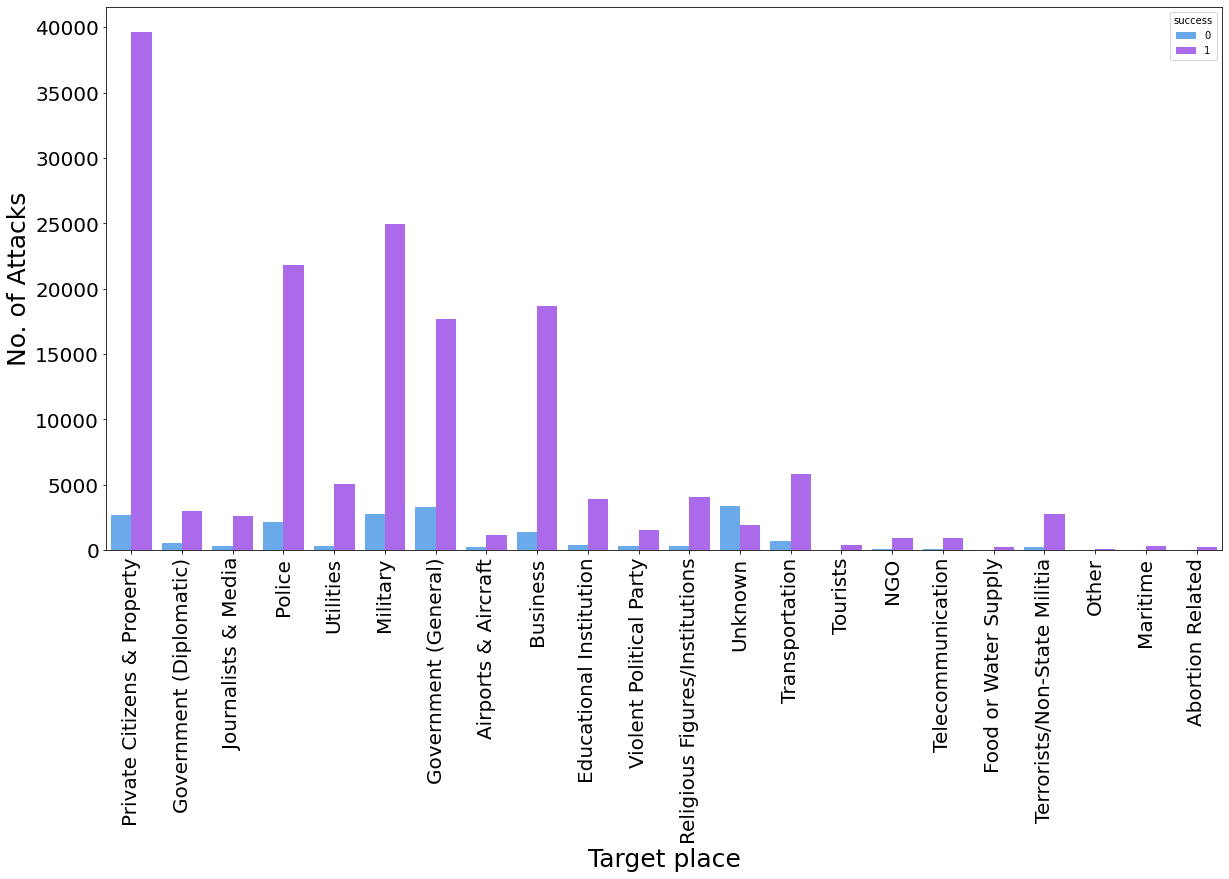

In [57]:
plt.figure(figsize=(20,10)) 
ax = sns.countplot(df["targtype1_txt"],hue=df["success"],palette='cool') 
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Target place',fontsize=25)
plt.ylabel('No. of Attacks',fontsize=25)
plt.show()

In [31]:
df['targtype1_txt'].value_counts()

Private Citizens & Property       42302
Military                          27728
Police                            24040
Government (General)              21001
Business                          20099
Transportation                     6487
Utilities                          5364
Unknown                            5352
Religious Figures/Institutions     4402
Educational Institution            4287
Government (Diplomatic)            3544
Terrorists/Non-State Militia       3028
Journalists & Media                2926
Violent Political Party            1830
Airports & Aircraft                1332
Telecommunication                   967
NGO                                 960
Tourists                            440
Maritime                            346
Food or Water Supply                309
Abortion Related                    263
Other                               134
Name: targtype1_txt, dtype: int64